# Introducción a las Redes Neurales

<img src="https://i.pinimg.com/736x/a4/c0/28/a4c0286e72c320f838b63ee5e747809a.jpg" align="center" height =400 width=800/>

## El Perceptrón

El perceptrón es un algoritmo basado en el modelo de neuronas

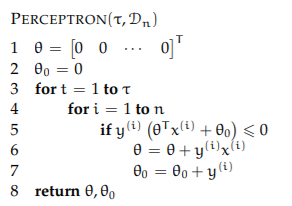

Si

$$\theta_1 x + \theta_2 y + theta_0 =0$$

Entonces 

$$y = \frac{theta_1}{theta_2} x + \frac{theta_0}{theta_2} $$

Esto toma la forma de 

$$y=mx+b$$

Donde

$$m=\frac{theta_1}{theta_2}$$
$$b=\frac{theta_0}{theta_2}$$

### Generación de datos sintéticos:

In [21]:
# importe de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# semilla
np.random.seed(1)

# número de ejemplos 
n=2000

# Generación de datos sintéticos (distribución normal) con distintas medias
x1,y1 = np.random.normal(1,1,int(n/2)),np.random.normal(1,1,int(n/2))
x2,y2 = np.random.normal(6,1,int(n/2)),np.random.normal(6,1,int(n/2))

# junta los datos de las dos distribuciones y les asigna un valor "objetivo"
x = np.append(x1,x2)
y = np.append(y1,y2)
label=np.append([-1]*int(n/2),[1]*int(n/2))

# convierte los datos en un Data Frame de pandas
data = pd.DataFrame({"x":x,"y":y,"label":label}) 
data.head()

,x,y,label
0,2.624345,0.846764,-1
1,0.388244,-1.432509,-1
2,0.471828,1.507984,-1
3,-0.072969,0.675968,-1
4,1.865408,-0.511077,-1


### Gráfico de datos

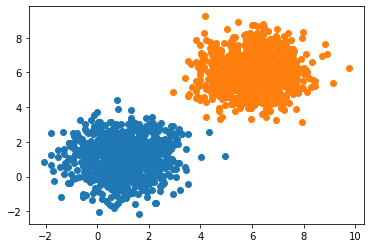

In [22]:
# grafico de los datos
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

## Algoritmo del perceptrón

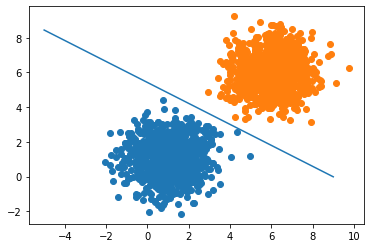

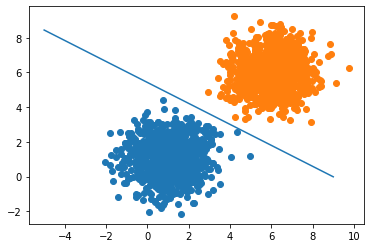

In [23]:
# importe de librerias
%matplotlib inline
import time
import pylab as pl
from IPython import display


def perceptron(T,data):

    # Valores iniciales de theta y theta_0
    theta=[0,0]
    theta_0=0

    for t in range(T): # T iteraciones
        for i in range(n): # recorrido en cada punto de datos
            X_i , Y_i = data[["x","y"]].iloc[i,:], data["label"][i]
            
            # predicción sobre el punto de datos
            prediction = np.sign(np.dot(theta, X_i) + theta_0)
            
            # si la predicción tiene signo contrario al valor real, reasigna valores de theta y theta_0
            if np.multiply(Y_i,prediction)<=0:
                theta +=  np.multiply(Y_i,X_i)
                theta_0 += Y_i
        
        
        # para cada iteración completa sobre los datos, grafíca el separador obtenido
        m=-theta[0]/theta[1]
        b=-theta_0/theta[1]
        
        x = list(range(-5, 10))
        y = np.multiply(m,x) + b
        
        pl.clf()
        pl.scatter(x1,y1)
        pl.scatter(x2,y2)
        pl.plot(x,y)
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)

perceptron(10,data)

## Análisis de la función sigmoide

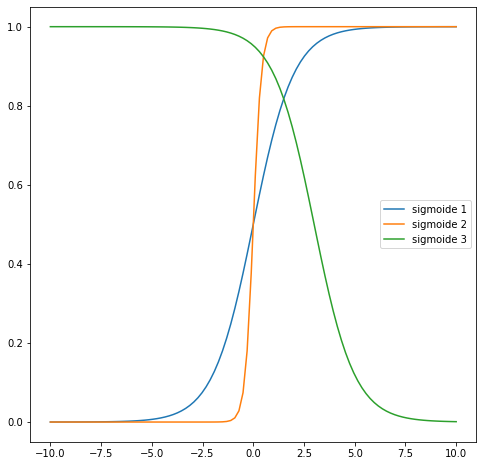

In [24]:
def sigmoide(m,b,x):
    z=m*x+b
    return 1/(1+np.exp(-z)) 

x = np.linspace(-10,10,100)

y1 = [sigmoide(1,0,z) for z in x]
y2 = [sigmoide(5,0,z) for z in x]
y3 = [sigmoide(-1,3,z) for z in x]

pl.figure(figsize=(8,8))
plt.plot(x,y1,label="sigmoide 1")
plt.plot(x,y2,label="sigmoide 2")
plt.plot(x,y3,label="sigmoide 3")
plt.legend()
plt.show()

## Análisis del cambio de valores en el algoritmo de perceptrón

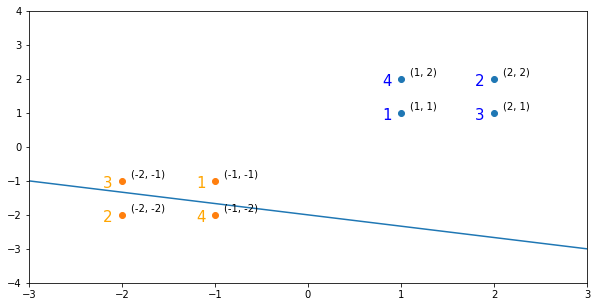

In [25]:
x1=[1,2,2,1]
y1=[1,2,1,2]
x2=[-1,-2,-2,-1]
y2=[-1,-2,-1,-2]

m=-1/3
b=-2

theta2=3
theta1=-1
theta_0=-6

theta=[theta1,theta2]

linex=np.linspace(-3,3,40)
liney=[m*x+b for x in linex]


plt.figure(figsize=(10,5))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(linex,liney)
plt.xlim(-3,3)
plt.ylim(-4,4)

i=1
for x,y in zip(x1,y1):
    plt.annotate(str((x,y)), xy=(x, y), xytext=(x+.1, y+.1))
    plt.annotate(str(i), xy=(x, y), xytext=(x-.2, y-.2),color='blue', fontsize=15)
    i+=1
i=1
for x,y in zip(x2,y2):
    plt.annotate(str((x,y)), xy=(x, y), xytext=(x+.1, y+.1))
    plt.annotate(str(i), xy=(x, y), xytext=(x-.2, y-.2),color='orange', fontsize=15)
    i+=1
plt.show()

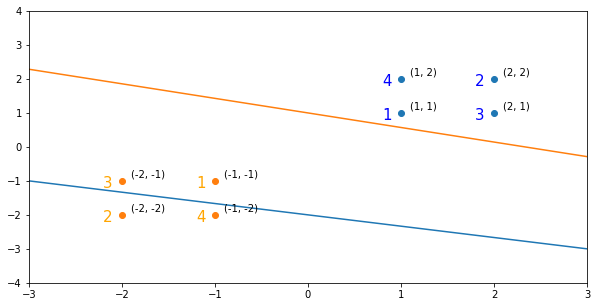

In [26]:

# primer ajuste

def ajuste(theta,theta_0):
    
    theta += np.dot(theta,[x1[2],x1[2]])

    theta_0 += -1

    m=-theta[0]/theta[1]
    b=-theta_0/theta[1]

    linex_ajustado=np.linspace(-3,3,40)
    liney_ajustado=[m*x+b for x in linex]

    plt.figure(figsize=(10,5))
    plt.scatter(x1,y1)
    plt.scatter(x2,y2)
    plt.plot(linex,liney)
    plt.plot(linex_ajustado,liney_ajustado)
    plt.xlim(-3,3)
    plt.ylim(-4,4)
    i=1
    for x,y in zip(x1,y1):
        plt.annotate(str((x,y)), xy=(x, y), xytext=(x+.1, y+.1))
        plt.annotate(str(i), xy=(x, y), xytext=(x-.2, y-.2),color='blue', fontsize=15)
        i+=1
    i=1
    for x,y in zip(x2,y2):
        plt.annotate(str((x,y)), xy=(x, y), xytext=(x+.1, y+.1))
        plt.annotate(str(i), xy=(x, y), xytext=(x-.2, y-.2),color='orange', fontsize=15)
        i+=1
    plt.show()
ajuste(theta,theta_0)

## Descenso del gradiente

### Generación de datos sintéticos

In [123]:
n=1000
x1 = np.random.normal(0,1,int(n/2))
x2 = np.random.normal(10,1,int(n/2))

x = np.append(x1,x2)
labels = np.append([0]*int(n/2),[1]*int(n/2))

data = pd.DataFrame({"x":x,"label":labels})
data = data.sample(len(data))
data.head()

,x,label
220,1.616950,0
809,11.555016,1
224,-1.219744,0
635,10.501725,1
705,10.026000,1


### Visualización de datos

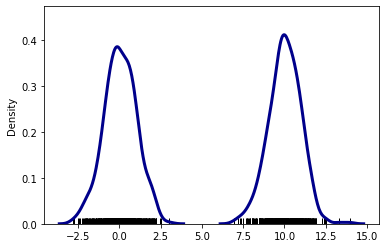

In [124]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


sns.distplot(x1,
             hist = False,
             kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
sns.distplot(x2,
             hist = False,
             kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

plt.show()

### Definición de funciones para el descenso del gradiente

In [125]:
# función sigmoide
def sigmoide(z):
    return 1/(1+np.exp(-z))

# funcion de costo (binary crossentropy)
def loss(theta,theta_0,X,Y):
        eps=0.0000001 # para evitar divergencia del logaritmo
        return  (-1/n)*np.sum([ y*np.log(sigmoide(theta*x + theta_0)+eps) + (1 - y)*np.log(1 - sigmoide(theta*x + theta_0) + eps) for x,y in zip(X,Y)])

# gradiente de la funcion de costo
def derivada_loss(theta,theta_0,X,Y):
    return (1/n)*np.sum([(sigmoide(theta*x + theta_0)-y)*x for x,y in zip(X,Y)])

# derivada del término independiente theta_0
def derivada_loss_theta_0(theta,theta_0,X,Y):
    return (1/n)*np.sum([(sigmoide( theta*x + theta_0) - y) for x,y in zip(X,Y)])

### Algoritmo de descenso del gradiente

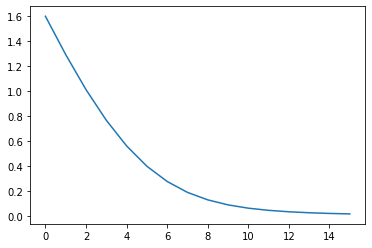

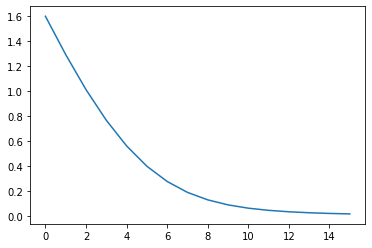

In [134]:
# hiperparametros 
eta=3 # tamaño del paso
eps=0.005 # tolerancia

def gradient_descent(eta, eps):
    # theta inicial aleatorio
    np.random.seed(1)
    theta = 0
    theta_0 = 0

    # criterio para las iteraciones
    criterio = True
    t=0

    # inicio de elemtos del gráfico
    f = []
    pl.title("Error del entrenamiento")
    pl.xlabel("epoch")
    pl.ylabel("Error")

    # descenso del gradiente 
    while criterio and t<1000:
        error = loss(theta,theta_0,x,labels)
        derivada_error = derivada_loss(theta,theta_0,x,labels)
        derivada_error_theta_0 = derivada_loss_theta_0(theta,theta_0,x,labels)
        theta =  theta - eta*derivada_error
        theta_0 =  theta_0 - eta*derivada_error_theta_0
        
        error_nuevo = loss(theta,theta_0,x,labels)

        # evaluar criterio
        criterio = (abs(error_nuevo-error) > eps)
        t+=1

        # gráfico
        f.append(error_nuevo)
        if t%1000:
            pl.clf()
            pl.plot(f)
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(1)
    return theta,theta_0

theta,theta_0 = gradient_descent(eta, eps)

### Resultados

In [135]:
# Data frame de resultados
results = pd.DataFrame({"g":[0 if i <0.5 else 1 for i in np.round([sigmoide(theta*i+theta_0)for i in x],3) ],"label":labels} )
results.head()

,g,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [136]:
## accuracy
acc=np.sum((results["g"] == results["label"]))/len(results)
print(pd.DataFrame({"accuracy":acc,"theta":theta,"theta_0":theta_0},index=[0]))

   accuracy     theta   theta_0
0     0.997  2.061192 -5.033562


(-5.0, 15.0)

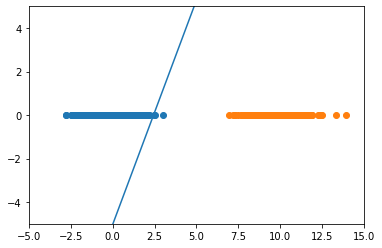

In [137]:
# Evaluacion gráfica de resultados
m=theta
b=theta_0
xi=np.linspace(-10,10,20)

yi = m*xi + b

plt.scatter(x1,[0]*len(x1))
plt.scatter(x2,[0]*len(x2))
    
plt.plot(xi,yi)
plt.ylim(-5,5)
plt.xlim(-5,15)

## Descenso del gradiente en dos dimensiones

### Generación de datos sintéticos

In [138]:
# generación de datos como 2 distribuciones normales de distinta media

n=1000 # cantidad de datos totales
x1,y1 = np.random.normal(0,1,int(n/2)),np.random.normal(0,1,int(n/2))
x2,y2 = np.random.normal(6,1,int(n/2)),np.random.normal(6,1,int(n/2))

x = np.append(x1,x2) # valores para el eje x
y = np.append(y1,y2) # valores para el eje y
label = np.append([0]*int(n/2),[1]*int(n/2)) # valores binarios asignados {0,1}

# creación del data frame de datos
data = pd.DataFrame({"x":x,"y":y,"label":label})
data = data.sample(n=n)
data.head()

,x,y,label
273,0.884909,0.095747,0
439,1.789755,-0.456988,0
593,6.197316,6.952548,1
324,0.621083,-1.067877,0
875,4.674509,5.427974,1


### Visualización de datos

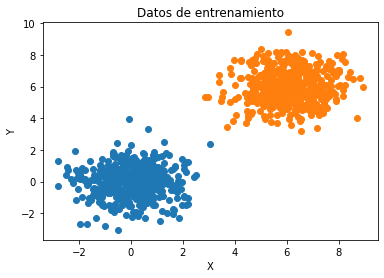

In [139]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.title("Datos de entrenamiento")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Definición de funciones para el descenso del gradiente

In [140]:
# funcion sigmoide
def sigmoide(z):
    return 1/(1+np.exp(-z))

# funcion de pérdida binary cross-entropy
def loss(theta,theta_0,X,Y,labels):
        eps=0.0000001 # evita la divergencia del logaritmo
        return  (-1/n)*np.sum([ l*np.log(sigmoide( np.dot(theta, [x,y]) + theta_0 ) + eps) + (1 - l)*np.log(1 - sigmoide(np.dot(theta, [x,y]) + theta_0) + eps) for x,y,l in zip(X,Y,labels)])

# gradiente de la funcion de costo
def gradiente_loss(theta,theta_0,X,Y,labels):
    return (1/n)*np.sum([np.multiply((sigmoide( np.dot(theta, [x,y]) + theta_0) - l),[x,y]) for x,y,l in zip(X,Y,labels)])

# derivada del término independiente theta_0
def derivada_loss_theta_0(theta,theta_0,X,Y,labels):
    return (1/n)*np.sum([(sigmoide( np.dot(theta, [x,y]) + theta_0) - l) for x,y,l in zip(X,Y,labels)])

### Algoritmo de descenso del gradiente

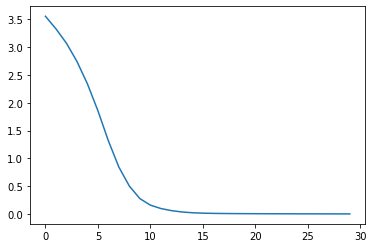

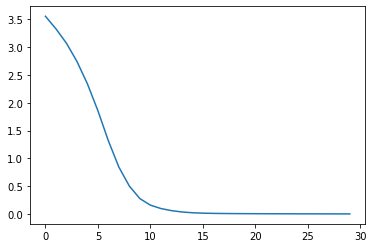

In [144]:
# hiperparametros 
eta = 8 # tamaño del paso
eps = 0.00001 # criterio de parada para la iteración

# datos (en arrays)
x = data["x"]
y = data["y"]
labels = data["label"]

def gradient_descent(eta, eps):
    
    # valores iniciales de los pesos
    np.random.seed(1)
    theta = np.append(np.random.normal(-0.5,1,1),np.random.normal(-0.5,1,1))
    theta_0 = np.random.normal(0,1,1)

    # criterio para las iteraciones
    criterio = True
    t=0

    # inicio de elemtos del gráfico
    f = []
    pl.title("Error del entrenamiento")
    pl.xlabel("epoch")
    pl.ylabel("Error")

    while criterio and t<30:
        error = loss(theta,theta_0,x,y,labels) # error inicial
        gradiente_error = gradiente_loss(theta,theta_0,x,y,labels) # dirección de crecimiento del error (gradiente) para los coeficientes de los features
        derivada_error_theta_0 = derivada_loss_theta_0(theta,theta_0,x,y,labels) # dirección de crecimiento del error (gradiente) para el término independiente
        
        # actualizacion de parámetros
        theta =  theta - np.multiply(eta,gradiente_error) 
        theta_0 =  theta_0 - eta*derivada_error_theta_0
        
        # error despues de la actualización de parámetros
        error_nuevo = loss(theta,theta_0,x,y,labels)
        
        # evaluación del criterio
        criterio = (abs(error-error_nuevo) > eps)
        
        # gráfico
        f.append(error_nuevo)
        t+=1
        
        if t%1000:
            pl.clf()
            pl.plot(f)
            
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(1)
    return theta, theta_0

theta,theta_0 = gradient_descent(eta, eps)

### Resultados

In [145]:
# creación del dataframe de resultados
x = data["x"]
y = data["y"]
labels = data["label"]
results = pd.DataFrame({"x":x,"y":y,"g":[0 if i <0.5 else 1 for i in np.round([list(sigmoide( np.dot(theta, [l,m]) + theta_0))[0] for l,m in zip(x,y)],3) ],"label":labels} )
results.head()

,x,y,g,label
273,0.884909,0.095747,0,0
439,1.789755,-0.456988,0,0
593,6.197316,6.952548,1,1
324,0.621083,-1.067877,0,0
875,4.674509,5.427974,1,1


In [146]:
# Accuracy
acc=np.sum((results["g"] == results["label"]))/len(results)
print(pd.DataFrame({"accuracy":acc},index=[0]))

   accuracy
0     0.999


(-5.0, 10.0)

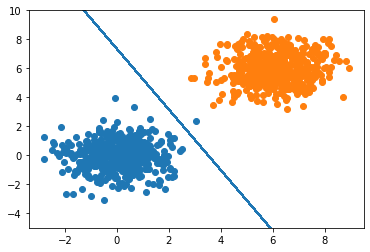

In [147]:
# Evaluacion gráfica de resultados
m=-theta[0]/theta[1]
b=-theta_0/theta[1]

y = np.multiply(m,x) + b

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(x,y)
plt.ylim(-5,10)

## Descenso del gradiente estocástico

In [148]:
# funcion sigmoide
def sigmoide(z):
    return 1/(1+np.exp(-z))

# funcion de pérdida binary cross-entropy
def loss(theta,theta_0,x,y,label):
        eps=0.0000001 # evita la divergencia del logaritmo
        return  (-1)*(label*np.log(sigmoide( np.dot(theta, [x,y]) + theta_0 ) + eps) + (1 - label)*np.log(1 - sigmoide(np.dot(theta, [x,y]) + theta_0) + eps))

# gradiente de la funcion de costo
def gradiente_loss(theta,theta_0,x,y,label):
    return np.multiply((sigmoide( np.dot(theta, [x,y]) + theta_0) - label),[x,y])

# derivada del término independiente theta_0
def derivada_loss_theta_0(theta,theta_0,x,y,label):
    return sigmoide( np.dot(theta, [x,y]) + theta_0) - label

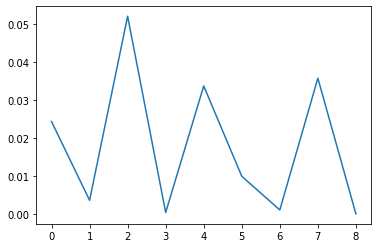

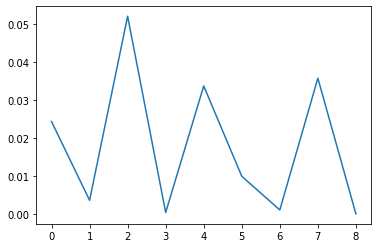

In [164]:
# hiperparametros 
eta = 5 # tamaño del paso
eps = 0.000001 # criterio de parada para la iteración

# datos (en arrays)
x = data["x"]
y = data["y"]
labels = data["label"]

def gradient_descent(eta, eps):
    
    # valores iniciales de los pesos
    np.random.seed(1)
    theta = np.append(np.random.normal(-0.5,1,1),np.random.normal(-0.5,1,1))
    theta_0 = np.random.normal(0,1,1)

    # criterio para las iteraciones
    criterio = True
    t=0

    # inicio de elemtos del gráfico
    f = []
    pl.title("Error del entrenamiento")
    pl.xlabel("epoch")
    pl.ylabel("Error")

    while criterio and t<300000:
        i = np.random.randint(0,len(x),1)[0]
        xi=x[i]
        yi=y[i]
        label=labels[i]

        error = loss(theta,theta_0,xi,yi,label) # error inicial
        gradiente_error = gradiente_loss(theta,theta_0,xi,yi,label) # dirección de crecimiento del error (gradiente) para los coeficientes de los features
        derivada_error_theta_0 = derivada_loss_theta_0(theta,theta_0,xi,yi,label) # dirección de crecimiento del error (gradiente) para el término independiente
        
        # actualizacion de parámetros
        theta =  theta - np.multiply(eta,gradiente_error) 
        theta_0 =  theta_0 - eta*derivada_error_theta_0
        
        # error despues de la actualización de parámetros
        error_nuevo = loss(theta,theta_0,xi,yi,label)
        
        # evaluación del criterio
        criterio = (abs(error-error_nuevo) > eps)
        
        # gráfico
        f.append(error_nuevo)
        t+=1
        
        if t%1000:
            pl.clf()
            pl.plot(f)
            
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(1)
    return theta, theta_0

theta,theta_0 = gradient_descent(eta, eps)

In [165]:
# creación del dataframe de resultados
x = data["x"]
y = data["y"]
labels = data["label"]
results = pd.DataFrame({"x":x,"y":y,"g":[0 if i <0.5 else 1 for i in np.round([list(sigmoide( np.dot(theta, [l,m]) + theta_0))[0] for l,m in zip(x,y)],3) ],"label":labels} )
# Accuracy
acc=np.sum((results["g"] == results["label"]))/len(results)
print(pd.DataFrame({"accuracy":acc},index=[0]))
results.head()

   accuracy
0     0.999


,x,y,g,label
273,0.884909,0.095747,0,0
439,1.789755,-0.456988,0,0
593,6.197316,6.952548,1,1
324,0.621083,-1.067877,0,0
875,4.674509,5.427974,1,1


(-5.0, 10.0)

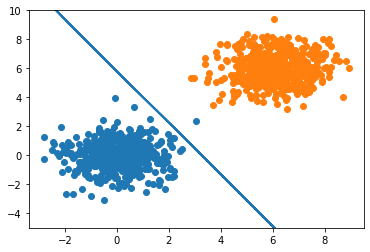

In [166]:
# Evaluacion gráfica de resultados
m=-theta[0]/theta[1]
b=-theta_0/theta[1]

y = np.multiply(m,x) + b

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(x,y)
plt.ylim(-5,10)

## Una aproximación intermedia

In [167]:
# funcion sigmoide
def sigmoide(z):
    return 1/(1+np.exp(-z))

# funcion de pérdida binary cross-entropy
def loss(theta,theta_0,X,Y,labels):
        eps=0.0000001 # evita la divergencia del logaritmo
        return  (-1/n)*np.sum([ l*np.log(sigmoide( np.dot(theta, [x,y]) + theta_0 ) + eps) + (1 - l)*np.log(1 - sigmoide(np.dot(theta, [x,y]) + theta_0) + eps) for x,y,l in zip(X,Y,labels)])

# gradiente de la funcion de costo
def gradiente_loss(theta,theta_0,X,Y,labels):
    return (1/n)*np.sum([np.multiply((sigmoide( np.dot(theta, [x,y]) + theta_0) - l),[x,y]) for x,y,l in zip(X,Y,labels)])

# derivada del término independiente theta_0
def derivada_loss_theta_0(theta,theta_0,X,Y,labels):
    return (1/n)*np.sum([(sigmoide( np.dot(theta, [x,y]) + theta_0) - l) for x,y,l in zip(X,Y,labels)])

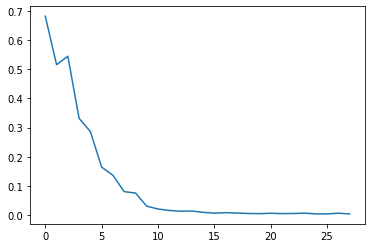

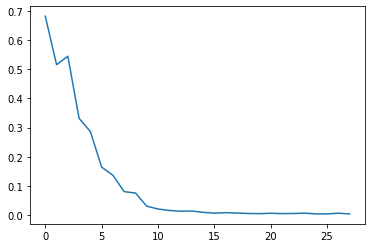

In [168]:
# hiperparametros 
eta = 9 # tamaño del paso
eps = 0.0001 # criterio de parada para la iteración
batch = 300

# datos (en arrays)
x = data["x"]
y = data["y"]
labels = data["label"]

def gradient_descent(eta, eps, batch):
    
    # valores iniciales de los pesos
    np.random.seed(1)
    theta = np.append(np.random.normal(-0.5,1,1),np.random.normal(-0.5,1,1))
    theta_0 = np.random.normal(0,1,1)

    # criterio para las iteraciones
    criterio = True
    t=0

    # inicio de elemtos del gráfico
    f = []
    pl.title("Error del entrenamiento")
    pl.xlabel("epoch")
    pl.ylabel("Error")

    while criterio and t<500000:
        i = np.random.randint(0,len(x),batch)
        xi=x[i]
        yi=y[i]
        label=labels[i]
        error = loss(theta,theta_0,xi,yi,label) # error inicial
        gradiente_error = gradiente_loss(theta,theta_0,xi,yi,label) # dirección de crecimiento del error (gradiente) para los coeficientes de los features
        derivada_error_theta_0 = derivada_loss_theta_0(theta,theta_0,xi,yi,label) # dirección de crecimiento del error (gradiente) para el término independiente
        
        # actualizacion de parámetros
        theta =  theta - np.multiply(eta,gradiente_error) 
        theta_0 =  theta_0 - eta*derivada_error_theta_0
        
        # error despues de la actualización de parámetros
        error_nuevo = loss(theta,theta_0,xi,yi,label)
        
        # evaluación del criterio
        criterio = (abs(error-error_nuevo) > eps)
        
        # gráfico
        f.append(error_nuevo)
        t+=1
        
        if t%1000:
            pl.clf()
            pl.plot(f)
            
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(1)
    return theta, theta_0

theta,theta_0 = gradient_descent(eta, eps,batch)

In [169]:
# creación del dataframe de resultados
x = data["x"]
y = data["y"]
labels = data["label"]
results = pd.DataFrame({"x":x,"y":y,"g":[0 if i <0.5 else 1 for i in np.round([list(sigmoide( np.dot(theta, [l,m]) + theta_0))[0] for l,m in zip(x,y)],3) ],"label":labels} )
# Accuracy
acc=np.sum((results["g"] == results["label"]))/len(results)
print(pd.DataFrame({"accuracy":acc},index=[0]))
results.head()

   accuracy
0     0.999


,x,y,g,label
273,0.884909,0.095747,0,0
439,1.789755,-0.456988,0,0
593,6.197316,6.952548,1,1
324,0.621083,-1.067877,0,0
875,4.674509,5.427974,1,1


(-5.0, 10.0)

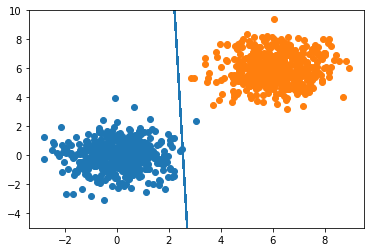

In [170]:
# Evaluacion gráfica de resultados
m=-theta[0]/theta[1]
b=-theta_0/theta[1]

y = np.multiply(m,x) + b

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.plot(x,y)
plt.ylim(-5,10)

# Red Neural Back Propagation

### Inicia los pesos (aleatorios) para cada neurona en la red

In [171]:
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


# 

In [172]:
from math import exp
 
# Calculate neuron activation for an input
def activate(weights, inputs): # W^T*x+b
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation): #sigmoide(activation)
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs) #W^T*x+b para cada neurona en la capa
			neuron['output'] = transfer(activation) # sigmoide(activation) para cada neurona de la capa
			new_inputs.append(neuron['output'])
		inputs = new_inputs # guarda las salidas en cada capa
	return inputs
 
# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1,0]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


In [173]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))): # itera en las capas (de la ultima a la primera)
		layer = network[i] # elige una capa
		errors = list() # inicia la lista de errores
		if i != len(network)-1: # no es la ultima capa
			for j in range(len(layer)): # para cada neurona en la capa
				error = 0.0
				for neuron in network[i + 1]: # para cada neurona en la capa que le sigue (mas cercana a la salida)
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)): # es la ultima capa
				neuron = layer[j] # para cada neurona en la ultima capa () 
				errors.append(expected[j] - neuron['output']) #  el error es el valor real-predicho
		for j in range(len(layer)): # cada neurona en la capa
			neuron = layer[j] 
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output']) #derivada de la sigmoide para la neurona dada 
 
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [174]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] # w's que multiplican las entradas
			neuron['weights'][-1] += l_rate * neuron['delta'] # w's independientes
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 

In [175]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]
[{'weights

In [176]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [177]:
# Test making predictions with the network
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
network = [[{'weights': [-1.482313569067226, 1.8308790073202204, 1.078381922048799]}, {'weights': [0.23244990332399884, 0.3621998343835864, 0.40289821191094327]}],
	[{'weights': [2.5001872433501404, 0.7887233511355132, -1.1026649757805829]}, {'weights': [-2.429350576245497, 0.8357651039198697, 1.0699217181280656]}]]
for row in dataset:
	prediction = predict(network, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
